In [59]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [60]:
# mont Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
df_data_train = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_TRAIN_no_outliers.xlsx", index_col="Unnamed: 0")
df_info_train = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_info_TRAIN_no_outliers.xlsx", index_col="Unnamed: 0")
X_train = df_data_train.values.astype(float)
y_train = df_info_train['emotion']

df_data_test = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_TEST_no_outliers.xlsx", index_col="Unnamed: 0")
df_info_test = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_info_TEST_no_outliers.xlsx", index_col="Unnamed: 0")
X_test = df_data_test.values.astype(float)
y_test = df_info_test['emotion']

## Pre-processing

In [62]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Sklearn Multilayer Perceptron

In [65]:
from sklearn.neural_network import MLPClassifier

In [66]:
hidden_layer_sizes = (100, 200,)

### Parameters

hidden_layer_sizes tuple, length = n_layers - 2, default=(100,)
The ith element represents the number of neurons in the ith hidden layer.

activation {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
Activation function for the hidden layer.
* 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x
* 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
* 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).
* 'relu', the rectified linear unit function, returns f(x) = max(0, x)

solver {'lbfgs', 'sgd', 'adam'}, default='adam'
The solver for weight optimization.
* 'lbfgs' is an optimizer in the family of quasi-Newton methods.
* 'sgd' refers to stochastic gradient descent.
* 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
The default solver 'adam' works pretty well on relatively large datasets (>= 1000 training samples) in terms of both training time and validation score. For small datasets, 'lbfgs' can converge faster and perform better.

alpha float, default=0.0001
L2 penalty (regularization term) parameter.

batch_size int, default='auto'
Size of minibatches for stochastic optimizers. If the solver is 'lbfgs', the classifier will not use minibatch. When set to “auto”, batch_size=min(200, n_samples)

learning_rate {'constant', 'invscaling', 'adaptive'}, default='constant'
Learning rate schedule for weight updates.
*'constant' is a constant learning rate given by 'learning_rate_init'.
*'invscaling' gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of *'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t)
*'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.
Only used when solver='sgd'.

learning_rate_init double, default=0.001
The initial learning rate used. It controls the step-size in updating the weights. Only used when solver='sgd' or 'adam'.

power_t double, default=0.5
The exponent for inverse scaling learning rate. It is used in updating effective learning rate when the learning_rate is set to 'invscaling'. Only used when solver='sgd'.

max_iter int, default=200
Maximum number of iterations. The solver iterates until convergence (determined by 'tol') or this number of iterations. For stochastic solvers ('sgd', 'adam'), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.

shuffle bool, default=True
Whether to shuffle samples in each iteration. Only used when solver='sgd' or 'adam'.

random_state int, RandomState instance or None, default=None
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

tol float, default=1e-4
Tolerance for the optimization. When the loss or score is not improving by at least tol for n_iter_no_change consecutive iterations, unless learning_rate is set to 'adaptive', convergence is considered to be reached and training stops.

verbose bool, default=False
Whether to print progress messages to stdout.

warm_start bool, default=False
When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. See the Glossary.

momentum float, default=0.9
Momentum for gradient descent update. Should be between 0 and 1. Only used when solver='sgd'.

early_stopping bool, default=False
Whether to use early stopping to terminate training when validation score is not improving. If set to true, it will automatically set aside 10% of training data as validation and terminate training when validation score is not improving by at least tol for n_iter_no_change consecutive epochs. The split is stratified, except in a multilabel setting. Only effective when solver='sgd' or 'adam'

validation_fraction float, default=0.1
The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if early_stopping is True

beta_1 float, default=0.9
Exponential decay rate for estimates of first moment vector in adam, should be in [0, 1). Only used when solver='adam'

beta_2 float, default=0.999
Exponential decay rate for estimates of second moment vector in adam, should be in [0, 1). Only used when solver='adam'

epsilon float, default=1e-8
Value for numerical stability in adam. Only used when solver='adam'

n_iter_no_change int, default=10
Maximum number of epochs to not meet tol improvement. Only effective when solver='sgd' or 'adam'


### Attributes
loss_ float
The current loss computed with the loss function.

coefs_ list, length n_layers - 1
The ith element in the list represents the weight matrix corresponding to layer i.

intercepts_ list, length n_layers - 1
The ith element in the list represents the bias vector corresponding to layer i + 1.

n_iter_ int,
The number of iterations the solver has ran.

n_layers_ int
Number of layers.

n_outputs_ int
Number of outputs.

out_activation_ string
Name of the output activation function.

In [67]:
clf = MLPClassifier(random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4485049833887043
F1-score [0.54098361 0.50704225 0.51546392 0.44171779 0.32258065 0.25
 0.36158192 0.55421687]
              precision    recall  f1-score   support

       angry       0.44      0.70      0.54        94
        calm       0.44      0.59      0.51        91
     disgust       0.51      0.52      0.52        48
     fearful       0.51      0.39      0.44        92
       happy       0.40      0.27      0.32        93
     neutral       0.35      0.20      0.25        46
         sad       0.39      0.34      0.36        94
   surprised       0.59      0.52      0.55        44

    accuracy                           0.45       602
   macro avg       0.45      0.44      0.44       602
weighted avg       0.45      0.45      0.44       602



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


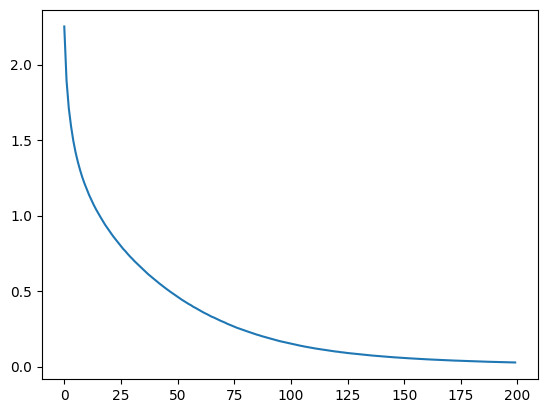

In [68]:
plt.plot(clf.loss_curve_)
plt.show()

In [69]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, 
                    learning_rate='adaptive', 
                    activation='tanh', early_stopping=False, 
                    momentum=0.9, random_state=0, max_iter=500)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4019933554817276
F1-score [0.59574468 0.45070423 0.45045045 0.15384615 0.3919598  0.34666667
 0.23529412 0.43181818]
              precision    recall  f1-score   support

       angry       0.50      0.74      0.60        94
        calm       0.39      0.53      0.45        91
     disgust       0.40      0.52      0.45        48
     fearful       0.26      0.11      0.15        92
       happy       0.37      0.42      0.39        93
     neutral       0.45      0.28      0.35        46
         sad       0.31      0.19      0.24        94
   surprised       0.43      0.43      0.43        44

    accuracy                           0.40       602
   macro avg       0.39      0.40      0.38       602
weighted avg       0.38      0.40      0.38       602



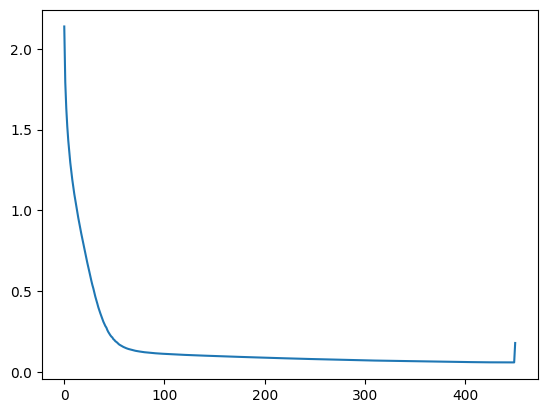

In [70]:
plt.plot(clf.loss_curve_)
plt.show()

In [71]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='adaptive', 
                    activation='tanh', early_stopping=True, momentum=0.9, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4435215946843854
F1-score [0.53877551 0.54166667 0.44444444 0.37349398 0.36065574 0.31168831
 0.37349398 0.51764706]
              precision    recall  f1-score   support

       angry       0.44      0.70      0.54        94
        calm       0.51      0.57      0.54        91
     disgust       0.48      0.42      0.44        48
     fearful       0.42      0.34      0.37        92
       happy       0.37      0.35      0.36        93
     neutral       0.39      0.26      0.31        46
         sad       0.43      0.33      0.37        94
   surprised       0.54      0.50      0.52        44

    accuracy                           0.44       602
   macro avg       0.45      0.43      0.43       602
weighted avg       0.44      0.44      0.43       602



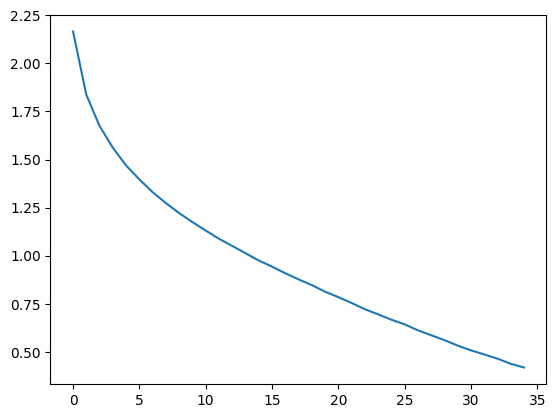

In [72]:
plt.plot(clf.loss_curve_)
plt.show()

# Keras Deep Neural Networks

In [73]:
# !pip install scikeras

In [88]:
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense

In [94]:
n_classes = 8 #questo numero deve essere il numero di classi che può classificare
def build_model():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer="adam", metrics=['accuracy'])
    return model

In [95]:
model1 = build_model()
model1.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 128)               12416     
                                                                 
 dense_48 (Dense)            (None, 64)                8256      
                                                                 
 dense_49 (Dense)            (None, 8)                 520       
                                                                 
Total params: 21,192
Trainable params: 21,192
Non-trainable params: 0
_________________________________________________________________


In [96]:
#faccio corrispondere ai nomi delle classi dei numeri da 0 a 7
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y_tr = le.fit_transform(y_train)
Y_te = le.fit_transform(y_test)

In [93]:
list(le.classes_)

['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [97]:
history1 = model1.fit(X_train, Y_tr, epochs=200, batch_size=32).history

Epoch 1/200
56/56 [==============================] - 1s 3ms/step - loss: 1.8201 - accuracy: 0.2705
Epoch 2/200
56/56 [==============================] - 0s 2ms/step - loss: 1.4077 - accuracy: 0.4747
Epoch 3/200
56/56 [==============================] - 0s 2ms/step - loss: 1.1964 - accuracy: 0.5641
Epoch 4/200
56/56 [==============================] - 0s 2ms/step - loss: 1.0428 - accuracy: 0.6305
Epoch 5/200
56/56 [==============================] - 0s 2ms/step - loss: 0.9241 - accuracy: 0.6811
Epoch 6/200
56/56 [==============================] - 0s 2ms/step - loss: 0.8323 - accuracy: 0.6980
Epoch 7/200
56/56 [==============================] - 0s 2ms/step - loss: 0.7494 - accuracy: 0.7385
Epoch 8/200
56/56 [==============================] - 0s 3ms/step - loss: 0.6647 - accuracy: 0.7717
Epoch 9/200
56/56 [==============================] - 0s 3ms/step - loss: 0.5900 - accuracy: 0.8060
Epoch 10/200
56/56 [==============================] - 0s 3ms/step - loss: 0.5114 - accuracy: 0.8526
Epoch 11/

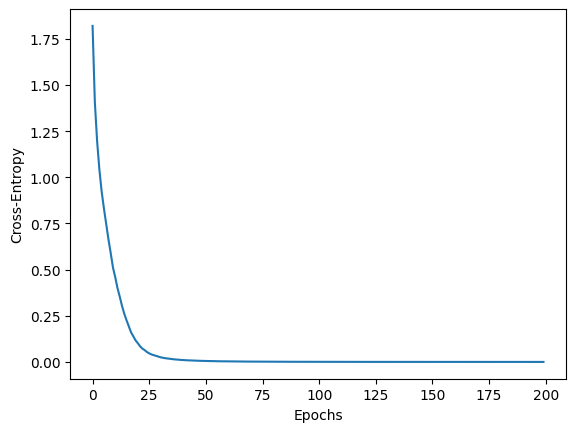

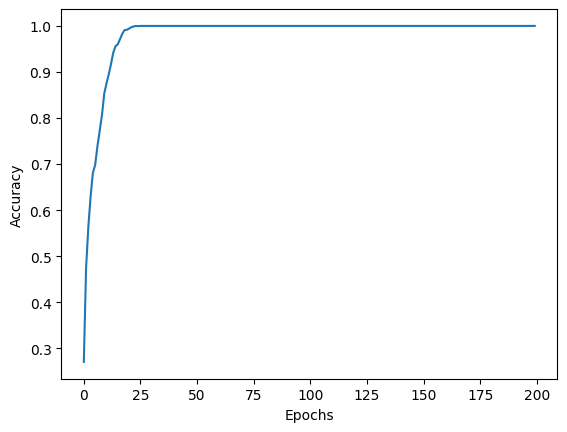

In [98]:
plt.plot(history1['loss'])
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.show()
plt.plot(history1['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [99]:
test_loss_1, test_acc_1 = model1.evaluate(X_test, Y_te)
print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))

19/19 [==============================] - 2s 8ms/step - loss: 6.7728 - accuracy: 0.4601
Loss 6.772754, Accuracy 0.460133


### Sklearn Wrapper
wraps a keras model in a sklearn-like object

In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [100]:
from scikeras.wrappers import KerasClassifier

In [101]:
clf = KerasClassifier(build_fn=build_model)

In [102]:
clf.fit(X_train, y_train, epochs=200)

Epoch 1/200


/usr/local/lib/python3.9/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


56/56 [==============================] - 1s 4ms/step - loss: 1.8461 - accuracy: 0.2610
Epoch 2/200
56/56 [==============================] - 0s 4ms/step - loss: 1.4030 - accuracy: 0.4685
Epoch 3/200
56/56 [==============================] - 0s 3ms/step - loss: 1.1875 - accuracy: 0.5675
Epoch 4/200
56/56 [==============================] - 0s 3ms/step - loss: 1.0383 - accuracy: 0.6249
Epoch 5/200
56/56 [==============================] - 0s 4ms/step - loss: 0.9096 - accuracy: 0.6822
Epoch 6/200
56/56 [==============================] - 0s 4ms/step - loss: 0.8146 - accuracy: 0.7222
Epoch 7/200
56/56 [==============================] - 0s 3ms/step - loss: 0.7215 - accuracy: 0.7655
Epoch 8/200
56/56 [==============================] - 0s 2ms/step - loss: 0.6398 - accuracy: 0.7891
Epoch 9/200
56/56 [==============================] - 0s 3ms/step - loss: 0.5680 - accuracy: 0.8273
Epoch 10/200
56/56 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.8560
Epoch 11/200
56/56 [=

KerasClassifier(
	model=None
	build_fn=<function build_model at 0x7f142d4f3dc0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [103]:
clf.model_.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 128)               12416     
                                                                 
 dense_51 (Dense)            (None, 64)                8256      
                                                                 
 dense_52 (Dense)            (None, 8)                 520       
                                                                 
Total params: 21,192
Trainable params: 21,192
Non-trainable params: 0
_________________________________________________________________


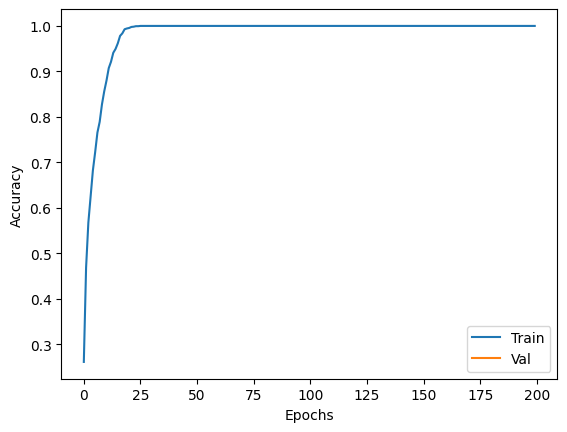

In [104]:
history = clf.history_
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

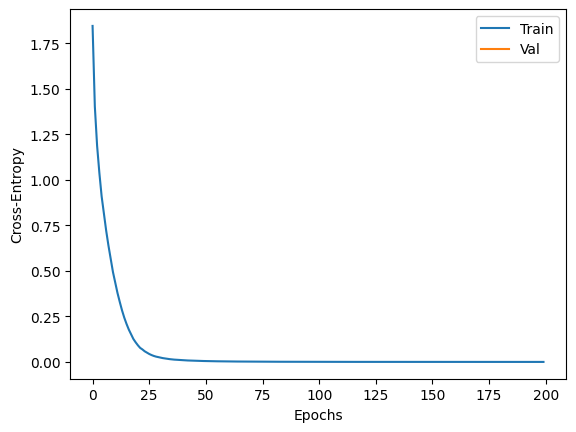

In [105]:
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [107]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

19/19 [==============================] - 0s 3ms/step
Accuracy 0.4318936877076412
F1-score [0.5785124  0.47311828 0.4516129  0.37419355 0.34567901 0.28947368
 0.36180905 0.46153846]
              precision    recall  f1-score   support

       angry       0.47      0.74      0.58        94
        calm       0.46      0.48      0.47        91
     disgust       0.47      0.44      0.45        48
     fearful       0.46      0.32      0.37        92
       happy       0.41      0.30      0.35        93
     neutral       0.37      0.24      0.29        46
         sad       0.34      0.38      0.36        94
   surprised       0.45      0.48      0.46        44

    accuracy                           0.43       602
   macro avg       0.43      0.42      0.42       602
weighted avg       0.43      0.43      0.42       602



In [108]:
clf = KerasClassifier(build_fn=build_model)

In [109]:
clf.fit(X_train, y_train, validation_split=0.2, epochs=1000)

Epoch 1/1000


/usr/local/lib/python3.9/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


45/45 [==============================] - 1s 7ms/step - loss: 1.8643 - accuracy: 0.2743 - val_loss: 1.7064 - val_accuracy: 0.3399
Epoch 2/1000
45/45 [==============================] - 0s 3ms/step - loss: 1.4345 - accuracy: 0.4543 - val_loss: 1.5598 - val_accuracy: 0.3933
Epoch 3/1000
45/45 [==============================] - 0s 4ms/step - loss: 1.2095 - accuracy: 0.5591 - val_loss: 1.5056 - val_accuracy: 0.4129
Epoch 4/1000
45/45 [==============================] - 0s 3ms/step - loss: 1.0418 - accuracy: 0.6259 - val_loss: 1.5260 - val_accuracy: 0.3933
Epoch 5/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.9126 - accuracy: 0.6835 - val_loss: 1.5165 - val_accuracy: 0.4157
Epoch 6/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.8013 - accuracy: 0.7356 - val_loss: 1.6069 - val_accuracy: 0.3792
Epoch 7/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.7058 - accuracy: 0.7651 - val_loss: 1.6602 - val_accuracy: 0.3848
Epoch 8/1000
45/45 

KerasClassifier(
	model=None
	build_fn=<function build_model at 0x7f142d4f3dc0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [110]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

19/19 [==============================] - 0s 3ms/step
Accuracy 0.41029900332225916
F1-score [0.50549451 0.46560847 0.35294118 0.4025974  0.36986301 0.31578947
 0.31746032 0.41304348]
              precision    recall  f1-score   support

       angry       0.39      0.73      0.51        94
        calm       0.45      0.48      0.47        91
     disgust       0.41      0.31      0.35        48
     fearful       0.50      0.34      0.40        92
       happy       0.51      0.29      0.37        93
     neutral       0.40      0.26      0.32        46
         sad       0.32      0.32      0.32        94
   surprised       0.40      0.43      0.41        44

    accuracy                           0.41       602
   macro avg       0.42      0.40      0.39       602
weighted avg       0.42      0.41      0.40       602



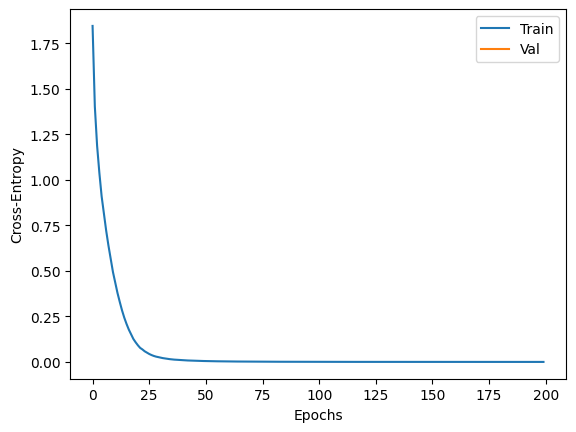

In [111]:
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

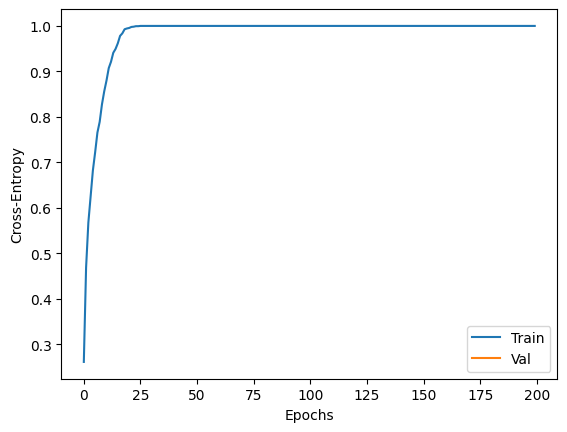

In [112]:
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

## Early Stopping

In [113]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

The most relevant arguments are:

* monitor: quantity to be monitored
* patience: number of epochs with no improvement after which training will be stopped

In [114]:
es = EarlyStopping(monitor='val_accuracy', patience=50, verbose=True)
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_accuracy', save_best_only=True)

clf = KerasClassifier(build_model, callbacks=[es, mc])

In [115]:
clf.fit(X_train, y_train, validation_split=0.2, epochs=500)

Epoch 1/500
45/45 [==============================] - 1s 8ms/step - loss: 1.8370 - accuracy: 0.2940 - val_loss: 1.6904 - val_accuracy: 0.3764
Epoch 2/500
45/45 [==============================] - 0s 4ms/step - loss: 1.4184 - accuracy: 0.4662 - val_loss: 1.5724 - val_accuracy: 0.3848
Epoch 3/500
45/45 [==============================] - 0s 3ms/step - loss: 1.2000 - accuracy: 0.5738 - val_loss: 1.5288 - val_accuracy: 0.3848
Epoch 4/500
45/45 [==============================] - 0s 3ms/step - loss: 1.0361 - accuracy: 0.6378 - val_loss: 1.5356 - val_accuracy: 0.3904
Epoch 5/500
45/45 [==============================] - 0s 4ms/step - loss: 0.9087 - accuracy: 0.6983 - val_loss: 1.5550 - val_accuracy: 0.4073
Epoch 6/500
45/45 [==============================] - 0s 5ms/step - loss: 0.8040 - accuracy: 0.7412 - val_loss: 1.6982 - val_accuracy: 0.3848
Epoch 7/500
45/45 [==============================] - 0s 4ms/step - loss: 0.7055 - accuracy: 0.7700 - val_loss: 1.6465 - val_accuracy: 0.4213
Epoch 8/500
4

KerasClassifier(
	model=<function build_model at 0x7f142d4f3dc0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.callbacks.EarlyStopping object at 0x7f14259daf40>, <keras.callbacks.ModelCheckpoint object at 0x7f14259a8310>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [117]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

19/19 [==============================] - 0s 2ms/step
Accuracy 0.43853820598006643
F1-score [0.546875   0.49484536 0.37209302 0.43537415 0.41212121 0.31578947
 0.35294118 0.40860215]
              precision    recall  f1-score   support

       angry       0.43      0.74      0.55        94
        calm       0.47      0.53      0.49        91
     disgust       0.42      0.33      0.37        48
     fearful       0.58      0.35      0.44        92
       happy       0.47      0.37      0.41        93
     neutral       0.40      0.26      0.32        46
         sad       0.35      0.35      0.35        94
   surprised       0.39      0.43      0.41        44

    accuracy                           0.44       602
   macro avg       0.44      0.42      0.42       602
weighted avg       0.45      0.44      0.43       602



#### L2 Regularization

In [118]:
from keras.regularizers import l2, l1

def build_L2_model():
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(h_dim, activation='relu', 
                    input_shape=(n_feature,), kernel_regularizer=l2(0.001)))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dense(n_classes))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [119]:
mc = ModelCheckpoint('best_model_L2.h5', monitor='val_accuracy', save_best_only=True)

L2_model = KerasClassifier(build_L2_model, callbacks=[es,mc])
L2_model.fit(X_train, y_train, validation_split=0.2, epochs=500)

Epoch 1/500
45/45 [==============================] - 144s 3s/step - loss: 5.9391 - accuracy: 0.1941 - val_loss: 2.2391 - val_accuracy: 0.1433
Epoch 2/500
45/45 [==============================] - 0s 5ms/step - loss: 2.1771 - accuracy: 0.1371 - val_loss: 2.1770 - val_accuracy: 0.1404
Epoch 3/500
45/45 [==============================] - 0s 4ms/step - loss: 2.1769 - accuracy: 0.1336 - val_loss: 2.1768 - val_accuracy: 0.1404
Epoch 4/500
45/45 [==============================] - 0s 4ms/step - loss: 2.1767 - accuracy: 0.1329 - val_loss: 2.1765 - val_accuracy: 0.1404
Epoch 5/500
45/45 [==============================] - 0s 4ms/step - loss: 2.1764 - accuracy: 0.1329 - val_loss: 2.1762 - val_accuracy: 0.1404
Epoch 6/500
45/45 [==============================] - 0s 4ms/step - loss: 2.1761 - accuracy: 0.1329 - val_loss: 2.1759 - val_accuracy: 0.1404
Epoch 7/500
45/45 [==============================] - 0s 4ms/step - loss: 2.1758 - accuracy: 0.1322 - val_loss: 2.1756 - val_accuracy: 0.1404
Epoch 8/500


KerasClassifier(
	model=<function build_L2_model at 0x7f14258d4af0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.callbacks.EarlyStopping object at 0x7f14259daf40>, <keras.callbacks.ModelCheckpoint object at 0x7f1425726310>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

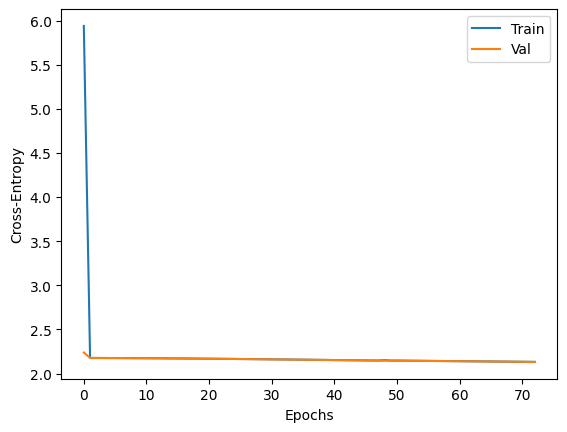

In [120]:
history = L2_model.history_
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

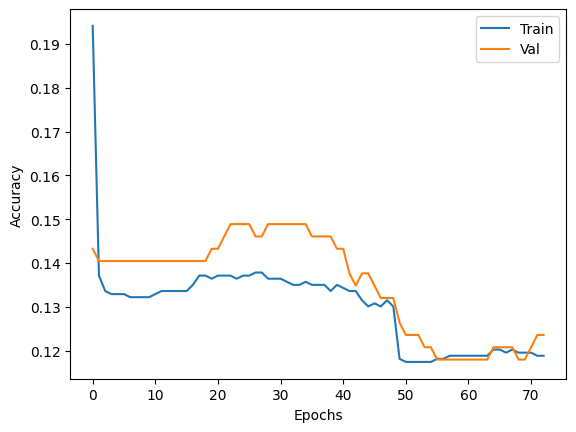

In [121]:
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Dropout

In [122]:
from keras.layers import Dropout

def build_DROPOUT_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(h_dim, activation='relu', input_shape=(n_feature,)))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(h_dim, activation='relu'))
    #linear activation
    model.add(Dense(n_classes))

    #compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [123]:
mc = ModelCheckpoint('best_model_DROPOUT.h5', monitor='val_accuracy', save_best_only=True)

DROPOUT_model = KerasClassifier(build_DROPOUT_model, callbacks=[es,mc])
DROPOUT_model.fit(X_train, y_train, validation_split=0.2, epochs=500)

Epoch 1/500
45/45 [==============================] - 2s 9ms/step - loss: 3.8669 - accuracy: 0.1899 - val_loss: 3.3052 - val_accuracy: 0.1882
Epoch 2/500
45/45 [==============================] - 0s 6ms/step - loss: 3.1115 - accuracy: 0.2208 - val_loss: 3.1865 - val_accuracy: 0.2051
Epoch 3/500
45/45 [==============================] - 0s 5ms/step - loss: 3.0302 - accuracy: 0.2757 - val_loss: 3.1822 - val_accuracy: 0.2528
Epoch 4/500
45/45 [==============================] - 0s 4ms/step - loss: 3.0207 - accuracy: 0.3200 - val_loss: 3.4828 - val_accuracy: 0.1854
Epoch 5/500
45/45 [==============================] - 0s 6ms/step - loss: 2.9950 - accuracy: 0.2236 - val_loss: 3.3400 - val_accuracy: 0.1826
Epoch 6/500
45/45 [==============================] - 0s 5ms/step - loss: 2.9004 - accuracy: 0.3277 - val_loss: 3.1995 - val_accuracy: 0.1826
Epoch 7/500
45/45 [==============================] - 0s 6ms/step - loss: 2.8678 - accuracy: 0.2180 - val_loss: 3.3212 - val_accuracy: 0.1742
Epoch 8/500
4

KerasClassifier(
	model=<function build_DROPOUT_model at 0x7f142d545e50>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.callbacks.EarlyStopping object at 0x7f14259daf40>, <keras.callbacks.ModelCheckpoint object at 0x7f1427fd1cd0>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

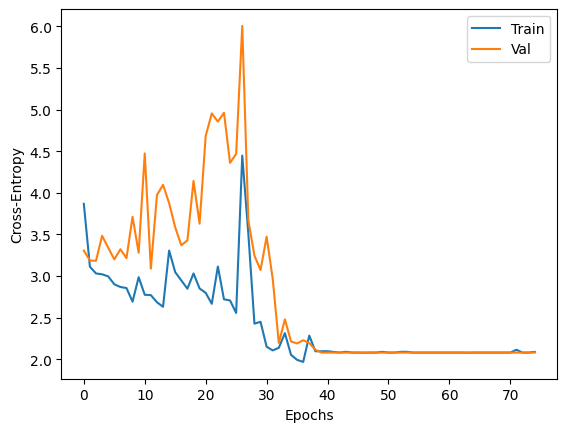

In [124]:
history = DROPOUT_model.history_
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

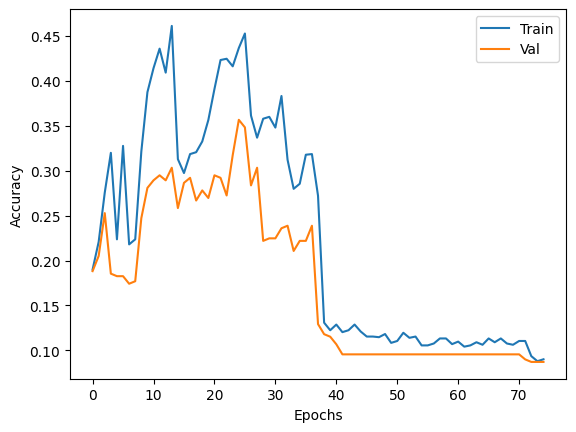

In [125]:
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Model Comparison

In [128]:
# laod best models and test them
from keras.models import load_model

best_NOREG_model = load_model('best_model_NOREG.h5')
best_L2_model = load_model('best_model_L2.h5')
best_DROPOUT_model = load_model('best_model_DROPOUT.h5')

loss_NOREG, acc_NOREG = best_NOREG_model.evaluate(X_test, Y_te)
loss_L2, acc_L2 = best_L2_model.evaluate(X_test, Y_te)
loss_DROPOUT, acc_DROPOUT = best_DROPOUT_model.evaluate(X_test,Y_te)

19/19 [==============================] - 0s 2ms/step - loss: 3.1800 - accuracy: 0.3654


In [129]:
print('Loss %f, Accuracy %f' % (loss_NOREG, acc_NOREG))
print('Loss %f, Accuracy %f' % (loss_L2, acc_L2))
print('Loss %f, Accuracy %f' % (loss_DROPOUT, acc_DROPOUT))

Loss 1.573601, Accuracy 0.453488
Loss 2.166975, Accuracy 0.091362
Loss 3.179970, Accuracy 0.365449


## Hyper-Parameter Tuning

In [130]:
from sklearn.model_selection import RandomizedSearchCV

In [131]:
def build_model(meta, hidden_layer_sizes, activation):
    n_features_in_ = meta["n_features_in_"]
    n_classes_ = meta["n_classes_"]
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(n_features_in_,)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation=activation))
    model.add(keras.layers.Dense(n_classes_, activation="softmax"))
    return model

In [132]:
clf = KerasClassifier(
    model=build_model,
    loss="sparse_categorical_crossentropy",
    verbose=False
)

In [133]:
params = {
    'optimizer__learning_rate': [0.001, 0.01, 0.1, 1],
    'model__hidden_layer_sizes': [(100, 100, 100), (50, 50, 50), (10, 10, 10), 
                                  (100, 50, 10), (10, 10, 10), (10, 10)],
    'model__activation': ['relu', 'tanh'],
    'optimizer': ["adam", "sgd"],
    'epochs': [10, 50, 100, 200]
}

gs = RandomizedSearchCV(clf, params, scoring='accuracy', n_jobs=-1, verbose=True, n_iter=15, cv=3)

In [134]:
gs.fit(X_train, y_train)

print(gs.best_score_, gs.best_params_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
0.38186120353068076 {'optimizer__learning_rate': 0.001, 'optimizer': 'adam', 'model__hidden_layer_sizes': (100, 50, 10), 'model__activation': 'relu', 'epochs': 10}


In [135]:
y_pred = gs.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.46179401993355484
F1-score [0.58299595 0.47953216 0.42424242 0.40559441 0.42937853 0.41758242
 0.37234043 0.52272727]
              precision    recall  f1-score   support

       angry       0.47      0.77      0.58        94
        calm       0.51      0.45      0.48        91
     disgust       0.41      0.44      0.42        48
     fearful       0.57      0.32      0.41        92
       happy       0.45      0.41      0.43        93
     neutral       0.42      0.41      0.42        46
         sad       0.37      0.37      0.37        94
   surprised       0.52      0.52      0.52        44

    accuracy                           0.46       602
   macro avg       0.47      0.46      0.45       602
weighted avg       0.47      0.46      0.45       602

